# Artificial Neural Networks with Keras

* ANNs are at the very core of deep learning.

# A. From Biological to Artificial Neurons:

### A.1 Biological Neurons:

* A biological Neuron: <br>
&emsp; 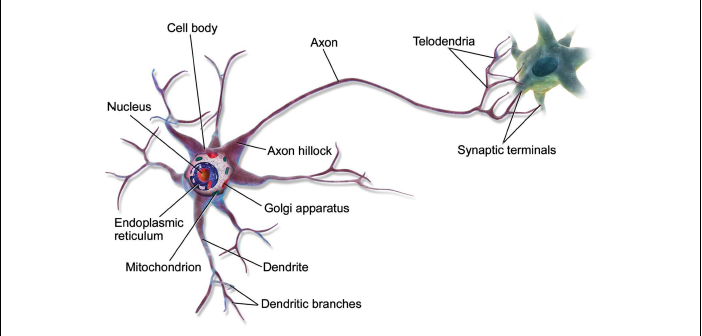

* Biological neurons produce short electrical impulses called *action potentials (APs, or just signals)*, which travel along the axons and make the synapses release chemical signals called *neurotransmitters*.
* When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (but actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).
* Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants.
* The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain).

### A.2. Logical Computations w/ Neurons:

* Artificial neuron
    * It has one or more binary (on/off) inputs and one binary output.
    * The artificial neuron activates its output when more than a certain number of its inputs are active.
    * Such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want.

* ANNs performing simple logical Computations: <br>
&emsp; 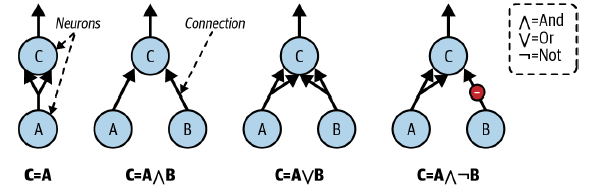
* $C\ =\ A$ : identity function, neuron C is activated if neuron A is activated, and v. versa.
* $C\ =\ A\ \wedge\ B$ : Logical AND, neuron is activated only when both neurons A and B are activated.
* $C\ =\ A\ \vee\ B$ : Logical OR, neuron C gets activated if either neuron A or neuron B is activated (or both).
* $C\ =\ A\ \wedge\ \rightharpoondown\ B$: Logical NOT, neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

### A.3. The Perceptron:

*  The perceptron is based on a slightly different artifical neuron called a *THRESHOLD LOGIC UNIT (TLU)* or *LINEAR THRESHOLD UNIT (LTU)*.
    * The inputs and outputs are numbers (instead of binary on/off values), and each input connection is associated w/ a weight.
    * The TLU first computes a linear function of its inputs: <br>
        &emsp; $z\ =\ w_1z_1\ +\ w_2z_2\ +...+\ w_nx_n\ +\ b\ =\ w^Tx+b$
    * Then the TLU applies a step function to the result:<br>
        &emsp; $h_w(x)\ =\ step(z)$ <br>
        &emsp; 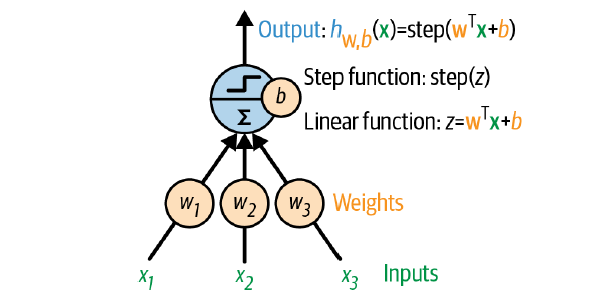

* Common step functions used in perceptrons (assuming threshold=0).
    * Heaviside Step Function: <br>
    &emsp; $heaviside(z) = \max \begin{dcases} \mathrm{0\ if\ z<0}  \\ \mathrm{1\ if\ z\geq0}  \\  \end{dcases}$
    * Sign Function: <br>
    &emsp; $sgn(z) = \max \begin{dcases} \mathrm{-1\ if\ z<0}  \\ \mathrm{0\ if\ z=0}  \\  \mathrm{+1\ if\ z>0}  \end{dcases}$

* A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. <br>
&emsp; 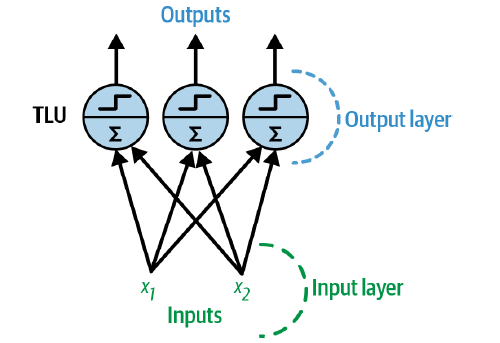
    * Computing the outputs of a fully connected layer:
    &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$, where:
        * $X$ represents the matrix of input features. It has one row per instance and one column per feature.
        * $W$ is the weight matrix that contains all the connection weights. It has one row per input and once column per neuron.
        * $b$ is the bias vector that contains all the bias terms: one per neuron.
        * function $\phi$ is the ACTIVATION FUNCTION : when the artificial neurons are TLUs, it is a step function.